In [59]:
import pandas as pd
sun = pd.read_csv('./data/일조시간.csv', encoding='euc-kr')
sun = sun.drop(['지점', '지점명'], axis=1)
sun = sun.rename(columns={'합계 일조시간(hr)' : '일조시간'})
sun = sun.rename(columns={'일조율(%)' : '일조율'})
sun = sun.rename(columns={'일시' : '날짜'})
sun['일조시간등락'] = sun['일조시간'].pct_change()
sun['일조율등락'] = sun['일조율'].pct_change()

sun = sun.dropna()

sun['월'] = sun['날짜'].str[-2:]
sun['월'] = sun['월'].astype(int)

sun.to_csv('./data/sun_df.csv', index=0)

In [42]:
sun_m = sun.groupby('월').mean()
sun_m

,일조시간,일조율,일조시간등락,일조율등락
월,,,,
1,191.561538,62.826923,0.070980,0.049165
2,186.423077,61.233846,-0.023250,-0.022478
3,221.346154,59.655385,0.194482,-0.019812
4,221.984615,56.160769,0.026303,-0.036594
5,245.958333,55.885000,0.127573,0.012609
6,220.916667,49.970833,-0.079125,-0.083207
7,145.058333,32.471667,-0.336104,-0.343199
8,166.741667,39.736667,0.188581,0.267698
9,196.183333,52.756667,0.319201,0.491662


In [54]:
df_all = pd.read_csv('./data/df_all.csv')
cloth_df = df_all[['날짜', '의류/잡화', '소비판매지수', '소비자물가지수']]
cloth_df

,날짜,의류/잡화,소비판매지수,소비자물가지수
0,201001,-18.0,-0.095082,0.007900
1,201002,0.3,-0.016908,0.002015
2,201003,15.8,0.054054,0.002023
3,201004,0.8,-0.018648,0.004026
4,201005,9.5,0.042755,0.001011
...,...,...,...,...
143,202112,-5.1,0.020048,0.001637
144,202201,-9.7,-0.076258,0.006248
145,202202,-18.8,-0.081702,0.005827
146,202203,23.5,0.130677,0.007217


In [58]:
cloth_df['날짜'] = cloth_df['날짜'].astype(str)
cloth_df['월'] = cloth_df['날짜'].str[-2:]
cloth_df['월'] = cloth_df['월'].astype(int)
cloth_df.to_csv('./data/cloth_df.csv', index=0)

/var/folders/wy/08qctpkd68s3_qyk81fm3w180000gn/T/ipykernel_15680/3705554913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cloth_df['날짜'] = cloth_df['날짜'].astype(str)
/var/folders/wy/08qctpkd68s3_qyk81fm3w180000gn/T/ipykernel_15680/3705554913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cloth_df['월'] = cloth_df['날짜'].str[-2:]
/var/folders/wy/08qctpkd68s3_qyk81fm3w180000gn/T/ipykernel_15680/3705554913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [56]:
cloth_m = cloth_df.groupby('월').mean()
cloth_m

,의류/잡화,소비판매지수,소비자물가지수
월,,,
1,-14.600000,-0.068581,0.005726
2,-7.584615,-0.068707,0.003762
3,18.176923,0.101897,0.000658
4,2.907692,-0.017042,0.001152
5,11.466667,0.049214,0.001094
6,-12.083333,-0.035554,-0.000504
7,-5.725000,0.006224,0.000503
8,-11.650000,-0.026092,0.004418
9,14.716667,0.045956,0.003408


In [57]:
sun_m

,일조시간,일조율,일조시간등락,일조율등락
월,,,,
1,191.561538,62.826923,0.070980,0.049165
2,186.423077,61.233846,-0.023250,-0.022478
3,221.346154,59.655385,0.194482,-0.019812
4,221.984615,56.160769,0.026303,-0.036594
5,245.958333,55.885000,0.127573,0.012609
6,220.916667,49.970833,-0.079125,-0.083207
7,145.058333,32.471667,-0.336104,-0.343199
8,166.741667,39.736667,0.188581,0.267698
9,196.183333,52.756667,0.319201,0.491662


In [32]:
df_all = pd.merge(df_all, sun, how = 'left', on = df_all.index)

In [36]:
df_all = df_all.rename(columns={'key_0' : '날짜'})
df_all

,날짜,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,자동차,여행/교통,스포츠/오락/여가,...,숙박,음식점,공과금/개인및전문서비스,금융/보험,소비판매지수,소비자물가지수,일조시간,일조율,일조시간등락,일조율등락
0,201001,-9.1,-10.7,-18.0,-9.6,-17.8,-1.8,-42.6,-6.4,-17.8,...,-12.8,-13.7,4.6,-11.0,-0.095082,0.007900,167.9,54.65,0.149213,0.117358
1,201002,-6.9,22.1,0.3,-4.0,-0.7,-5.8,2.1,-7.5,-9.0,...,-19.1,-9.7,-7.9,-4.2,-0.016908,0.002015,141.2,46.66,-0.159023,-0.146203
2,201003,15.7,-14.4,15.8,14.1,46.0,13.6,16.7,10.6,32.1,...,11.7,23.0,3.2,24.2,0.054054,0.002023,133.0,35.87,-0.058074,-0.231247
3,201004,-8.5,-0.7,0.8,0.3,-24.1,-3.3,-14.3,8.6,0.3,...,20.8,-2.9,3.4,-14.2,-0.018648,0.004026,166.3,42.09,0.250376,0.173404
4,201005,2.0,9.7,9.5,-1.7,5.1,-4.2,-4.0,5.3,12.4,...,6.7,9.0,-3.9,-3.9,0.042755,0.001011,178.5,40.59,0.073361,-0.035638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,202112,1.6,2.7,-5.1,-0.1,-11.4,5.5,4.7,-19.6,-21.0,...,-0.2,-8.6,8.7,5.3,0.020048,0.001637,185.4,62.07,0.133252,0.158671
144,202201,-0.3,28.4,-9.7,-1.9,11.3,2.2,-22.4,3.5,-12.7,...,-4.0,-6.1,19.6,-7.0,-0.076258,0.006248,206.9,67.35,0.115965,0.085065
145,202202,-9.6,-37.9,-18.8,-10.7,-7.5,-12.7,-0.2,-16.0,-7.9,...,-7.1,-17.4,-24.0,-5.0,-0.081702,0.005827,203.8,67.33,-0.014983,-0.000297
146,202203,13.2,11.4,23.5,20.3,4.2,15.9,12.2,26.1,39.8,...,-8.8,21.5,8.1,18.0,0.130677,0.007217,173.0,46.64,-0.151129,-0.307292


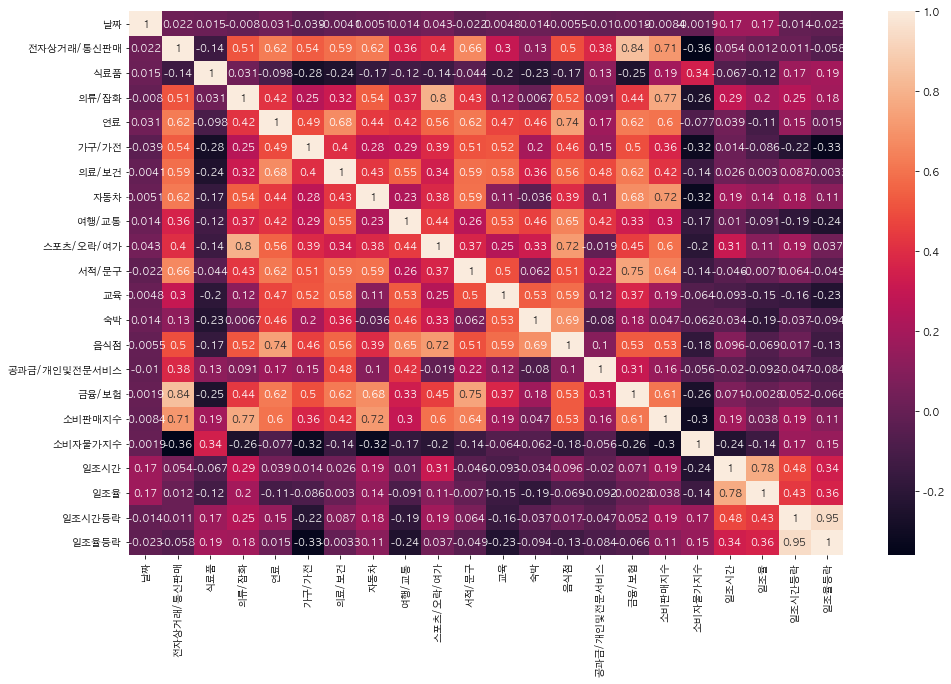

In [37]:
# 상관계수 히트맵

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc 

rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(16,10))

sns.heatmap(df_all.corr(), annot=True)

plt.show()